# Analisis de Datos MNIST Sign Language

Vamos a cargar los datos y ver que contienen.

In [34]:
%pip install tensorflow pandas numpy matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical

train = pd.read_csv('Datsetsign/sign_mnist_train.csv')
test = pd.read_csv('Datsetsign/sign_mnist_test.csv')

y_train = train['label'].values
x_train = train.drop('label', axis=1).values

y_test = test['label'].values
x_test = test.drop('label', axis=1).values

print("Datos de entrenamiento:", x_train.shape)
print("Datos de prueba:", x_test.shape)


[notice] A new release of pip is available: 24.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
Datos de entrenamiento: (27455, 784)
Datos de prueba: (7172, 784)


## Visualizamos una imagen

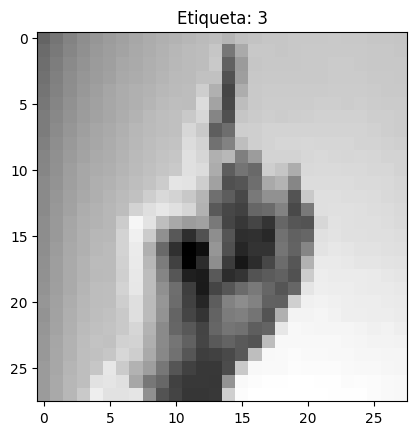

In [ ]:
img = x_train[0].reshape(28, 28)
plt.imshow(img, cmap='gray')
plt.title(f"Etiqueta: {y_train[0]}")
plt.show()

### Reporte 1: Dataset Exploration (EDA)
- **Tamaño del dataset**: 27,455 muestras de entrenamiento y 7,172 de prueba.
- **Dimensiones**: 28x28 pixeles (784 valores).
- **Clases**: 24 clases (letras A-Y, excluyendo J y Z).
- **Preprocesamiento necesario**: Normalización (0-1), Reshape (28x28x1), One-Hot Encoding.

## 1. Preprocesamiento (Normalizar y One-Hot)

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, 25)
y_test = to_categorical(y_test, 25)

## 2. Modelo Basico (Solo Dense)

In [37]:
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(25, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3784 - loss: 2.1408
Epoch 2/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6302 - loss: 1.2559
Epoch 3/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7303 - loss: 0.9300
Epoch 4/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7801 - loss: 0.7518
Epoch 5/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8259 - loss: 0.6139


In [38]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Precision modelo basico:", test_acc)

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.6456 - loss: 1.1291
Precision modelo basico: 0.6455661058425903


### Reporte 2: Baseline Model
- **Arquitectura**: Flatten -> Dense(128) -> Dense(25).
- **Observaciones**: Tiene muchos parÃ¡metros pero ignora la estructura espacial de la imagen.

## 3. Modelo Convolucional (CNN)

### Reporte 3: Diseño de Arquitectura
- **Capas Convolucionales**: 2 capas. Suficientes para imagenes pequeñas (28x28).
- **Kernel Size**: 3x3. Estándar para capturar detalles finos.
- **Stride/Padding**: Stride 1 y Padding 'same' para no perder bordes.
- **Activación**: ReLU (rápida y evita problemas de gradiente).
- **Pooling**: MaxPooling 2x2 para reducir tamaño y ganar invarianza.

In [39]:
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(25, activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_cnn.fit(x_train, y_train, epochs=5)

Epoch 1/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6892 - loss: 1.0313
Epoch 2/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9842 - loss: 0.0725
Epoch 3/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9993 - loss: 0.0101
Epoch 4/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9937 - loss: 0.0216
Epoch 5/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 1.0000 - loss: 0.0010


In [40]:
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(x_test, y_test)
print("Precision CNN:", test_acc_cnn)

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9035 - loss: 0.4926
Precision CNN: 0.9035136699676514


## 4. Experimento: Cambiando el Kernel a 5x5

In [ ]:
model_cnn_5 = Sequential([
    Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (5, 5), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(25, activation='softmax')
])

model_cnn_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_cnn_5.fit(x_train, y_train, epochs=5)

Epoch 1/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7668 - loss: 0.7736
Epoch 2/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9980 - loss: 0.0194
Epoch 3/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 1.0000 - loss: 0.0018
Epoch 4/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 1.0000 - loss: 7.3551e-04
Epoch 5/5
858/858 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 1.0000 - loss: 3.7187e-04


In [42]:
test_loss_cnn_5, test_acc_cnn_5 = model_cnn_5.evaluate(x_test, y_test)
print("Precision CNN (Kernel 5x5):", test_acc_cnn_5)

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9044 - loss: 0.3925
Precision CNN (Kernel 5x5): 0.9043502807617188


### Reporte 4: Resultados del Experimento
- **Observación**: El modelo funciona de manera similar, pero el kernel 3x3 suele ser mejor para detalles finos en imágenes pequeñas.
- **Trade-off**: Kernels más grandes (5x5) tienen más parámetros y pueden ignorar detalles muy pequeños, aunque ven un área mayor.

## 5. Interpretacion de Resultados

### Reporte 5: Interpretación y Razonamiento

**¿Por que la CNN funciona mejor?**
Porque la CNN mira las imagenes como matrices y busca formas  usando los filtros. El modelo Dense solo ve una lista de numeros y pierde la forma de la mano.

**¿Qué sesgo introduce?**
Introduce la idea de que los pixeles cercanos importan (localidad) y que una forma es la misma sin importar en que parte de la imagen este.

**¿Cuando no usar CNN?**
Cuando los datos no son imagenes o no tienen un orden espacial.